# MovieLens Dataset

## MovieLens 100k

In this notebook you will work with the well known [MovieLens 100k](http://grouplens.org/datasets/movielens/) data set that has moving rating for 100,000 movies.

The `prefix` should be set to the directory where the `ml-100k` data set is. Don't forget to use backslashes on Windows!

In [1]:
prefix = '/data/movielens-100k/ml-100k/'

## Imports

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import os

## Users

Use `pandas.read_csv` to read the `u.user` file as a Pandas `DataFrame` named `users`. See the tests below for the column names to use.

In [3]:
users = pd.read_csv(prefix+'u.user', delimiter='|', header=None, names=['age','gender','occupation','zip'])
users

,age,gender,occupation,zip
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002
10,53,M,lawyer,90703


Tidy the `users` table to get it to pass the tests below.

In [4]:
users.index.name = 'user_id'
users.gender = users.gender.astype('category')
users.occupation = users.occupation.astype('category')

In [5]:
users.head()

,age,gender,occupation,zip
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [6]:
assert len(users)==943
assert list(users.columns)==['age','gender','occupation','zip']
assert users.index.name=='user_id'
assert users.age.dtype.name=='int64'
assert users.gender.dtype.name=='category'
assert users.occupation.dtype.name=='category'

Make an appropriately labeled `countplot` with the `occupation` on the y-axis and the `gender` as the hue:

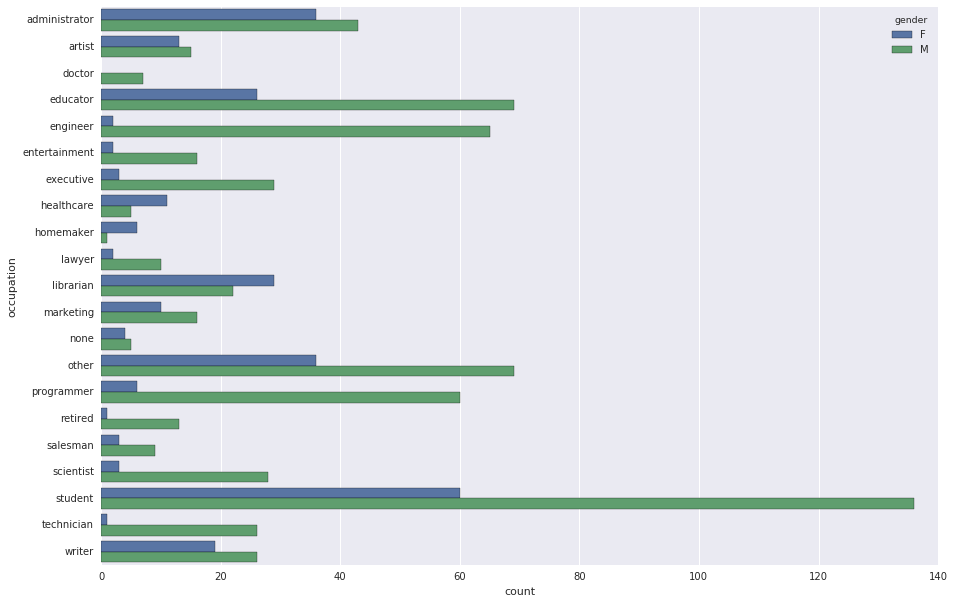

In [7]:
f = plt.figure(figsize=(15,10))
sns.countplot(y=users['occupation'], hue=users['gender'])

Make an appropriately labeled `distplot` of the `age` column:

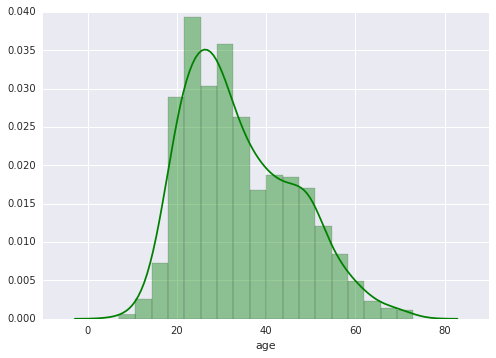

In [8]:
sns.distplot(users["age"], color="g")

## Genres

Use `pandas.read_csv` to read the `u.genre` file as a Pandas `DataFrame` named `genres`. See the tests below for the column names to use.

In [9]:
genres = pd.read_csv(prefix+'u.genre', delimiter='|', header=None, names=['genre'])
genres

,genre
unknown,0
Action,1
Adventure,2
Animation,3
Children's,4
Comedy,5
Crime,6
Documentary,7
Drama,8
Fantasy,9


Tidy the `genres` table to get it to pass the tests below.

In [10]:
genres.index.name = 'genre_id'
genres.genre = genres.genre.astype('category')

In [11]:
genres.head()

,genre
genre_id,
unknown,0
Action,1
Adventure,2
Animation,3
Children's,4


In [12]:
assert len(genres)==19
assert genres.index.name=='genre_id'
assert list(genres.columns)==['genre']
assert genres.genre.dtype.name=='category'

## Ratings

Use `pandas.read_csv` to read the `u.data` file as a Pandas `DataFrame` named `ratings`. See the tests below for the column names to use.

In [13]:
ratings = pd.read_csv(prefix+'u.data', delimiter='\t', header=None, names=['user_id','movie_id','rating','timestamp'])
ratings

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
5,298,474,4,884182806
6,115,265,2,881171488
7,253,465,5,891628467
8,305,451,3,886324817
9,6,86,3,883603013


In [14]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [15]:
assert len(ratings)==100000
assert ratings.user_id.dtype.name=='int64'
assert ratings.movie_id.dtype.name=='int64'
assert ratings.rating.dtype.name=='int64'
assert ratings.timestamp.dtype.name=='int64'

## Movies

Use `pandas.read_csv` to read the `u.item` file as a Pandas `DataFrame` named `movies`. See the tests below for the column names to use.

In [16]:
movies = pd.read_csv(prefix+'u.item', delimiter='|', header=None, names=["movie_id" , "movie_title" , "release_date" , "video_release_date" ,
              "IMDb_URL" , "unknown" , "Action" , "Adventure" , "Animation" ,
              "Children\'s" , "Comedy" , "Crime" , "Documentary" , "Drama" , "Fantasy" ,
              "Film-Noir" , "Horror" , "Musical" , "Mystery" , "Romance" , "Sci-Fi" ,
              "Thriller" , "War" , "Western"], encoding = "ISO-8859-1")
movies

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
movies.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In this form, the `movie_title` column has both the title and the year. Split these out into a `movie_title` column that only has the title and a `year` column. Also set the index to be the `movie_id`.

In [18]:
movies.insert(2,'year',movies.movie_title.str.rsplit(' ', n = 1, expand = True)[1])

In [19]:
movies.movie_title = movies.movie_title.str.rsplit(' ', n = 1, expand = True)[0]

In [20]:
movies.index.name='movie_id'

In [21]:
movies.head()

,movie_id,movie_title,year,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
0,1,Toy Story,(1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,(1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,(1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,(1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,(1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In the `year` column, replace `''` and `'V'` by `'unknown'`:

In [22]:
# http://stackoverflow.com/questions/23307301/pandas-replacing-column-values-in-dataframe

In [23]:
movies['year'] = movies['year'].map({'': 'unknown', '(V)': 'unknown', None: 'unknown'})

In [24]:
#movies.year.replace(to_replace=['(1995)','(1994)'], value=['unknown','unknown'], inplace=False, limit=None, regex=True, method='pad', axis=None)

In [25]:
movies.year.unique()

array([nan, 'unknown'], dtype=object)

In [26]:
movies.year.value_counts()['unknown']

5

In [27]:
assert '' not in movies.year.unique()
assert 'V' not in movies.year.unique()
assert movies.year.value_counts()['unknown']==5
assert movies.movie_title.dtype.name=='object'
assert movies.year.dtype.name=='object'
assert movies.index.name=='movie_id'

## Merges and joins

Use the `merge` function to create a single `DataFrame`, named `m1`, that has user's information (age, gender, occupation, zip) and the movie titles of all the movies they rated along with the rating for each movie. Sort the resulting index.

In [28]:
m1 = pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, 
              sort=False, suffixes=('_x', '_y'), copy=True, indicator=False)

NameError: name 'left' is not defined

In [ ]:
m1.head()

In [ ]:
assert list(m1.columns)==['age', 'gender', 'occupation', 'zip', 'rating', 'movie_title']
assert len(m1)==100000

Use `pandas.concat` to add another column to the `movies` `DataFrame`, named `count` that contains the integer number of time each movie was rated.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
movies.head()

In [ ]:
assert list(movies.columns)==['movie_title', 'year', 'count']
assert movies.index.name=='movie_id'

Make an appropriately labeled Seaborn `barplot` that shows the `count` on the x-axis and `movie_title` on the y-axis. Only show the 20 movies with the most reviews, sorted by the number of reviews.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Use `pandas.concat` to add another column to the movies `DataFrame`, named `rating` that contains the average rating for that movie.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
movies.head()

In [ ]:
assert list(movies.columns)==['movie_title','year','count','rating']

Make an appropriately labeled Seaborn `stripplot` with the mean rating on the x-axis and the `movie_title` on the y-axis. Order the movies by their mean rating and only show the top 30 movies. Only show a grid for the y-axis.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Explore the relationship between the number of reviews for a movie and its mean rating using a Seaborn `jointplot`:

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Compute the mean rating grouped by the year and use Seaborn's `regplot` to perform a bootstrapped linear regression of the `rating` against the `year` (you will have to read the documentation for `regplot` carefully). The idea here is to explore how the average rating evolves over time.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()